In [20]:
%matplotlib inline
import os
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import mean_squared_error 

In [4]:
target_date_files = os.listdir('20180417')
TARGET_DATE_LIST=[]
for DATE in range(1,31):
    TARGET_DATE_LIST.append('201804' + str(DATE).zfill(2))
taxi_hitmap_history=[]
for i in range(30):
    cur_date_dir = TARGET_DATE_LIST[i]
    hitmaps_path = os.listdir(cur_date_dir)
    num_hitmaps = len(hitmaps_path)
    idx_hitmap = 0
    for idx_time in range(len(target_date_files)):
        true_measurement_time_name = target_date_files[idx_time]
        data_measurement_time_name = hitmaps_path[idx_hitmap]
        if(data_measurement_time_name == true_measurement_time_name):
            path = os.path.join(cur_date_dir, data_measurement_time_name)
            hitmap = np.load(path)
            idx_hitmap = idx_hitmap + 1
        else:
            hitmap = hitmap_bfr
        taxi_hitmap_history.append(hitmap)
        hitmap_bfr = hitmap
taxi_hitmap_history_3d=np.dstack(taxi_hitmap_history)

In [35]:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.plot(rmse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [6]:
def maxk(num):
    max_amp = np.argpartition(amplitude, -num)[-num:]
    p = freqs[max_amp]
    q = phase[max_amp]
    r = amplitude[max_amp]
    return p, q, r

In [11]:
sampling_freq = 2

In [15]:
# 10% , train_days = 7 days
rmse = []
train_days = 7
percent = 0.1

In [17]:
num_train_hours = train_days * 24

In [22]:
x = np.linspace(0, 720, 1440)
for i in range(102):
    for j in range(110):
        train = taxi_hitmap_history_3d[i,j][:num_train_hours*sampling_freq]
        test = taxi_hitmap_history_3d[i,j][num_train_hours*sampling_freq:]
        fft_target_loc_history = np.fft.fft(train)
        sig_len = len(fft_target_loc_history)
        phase = [math.atan2(i.imag, i.real) for i in fft_target_loc_history]
        amplitude = np.abs(fft_target_loc_history/sig_len)
        amplitude = amplitude[:math.floor(sig_len/2)+1]
        amplitude[1:-1] = 2*amplitude[1:-1]
        freqs = [(sampling_freq*i/sig_len) for i in range(sig_len//2+1)]
        freqs = np.array(freqs)
        amplitude = np.array(amplitude)
        phase = np.array(phase)
        p, q, r = maxk(math.floor(percent*sig_len))
        pred1=[]
        for u in range(num_train_hours*sampling_freq,1440):
            pred=0
            for v in range(len(p)):
                a = p[v]
                b = q[v]
                c = r[v]
                pred = pred + c * math.cos(2*math.pi*a*x[u] + b)
            pred1.append(pred)
        rmse.append(np.sqrt(mean_squared_error(pred1, test)))

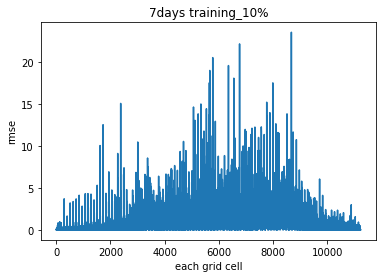

In [36]:
setup_graph(title='7days training_10%', x_label='each grid cell', y_label='rmse', fig_size=None)